# Simplest Environment Demo

This notebook demonstrates a simple active inference agent in JAX solving the simplest possible environment using the `jax-pymdp` library.

The simplest environment has:
- Two states (locations): left (0) and right (1)
- Two observations: left (0) and right (1) 
- Two actions: go left (0) and go right (1)

The environment is fully observed (the observation likelihood matrix A is the identity matrix) and deterministic (actions always lead to their corresponding states).

## Imports

Import the necessary libraries for the active inference agent and environment.

In [8]:
import jax.numpy as jnp
from jax import random as jr
from pymdp.envs.simplest import SimplestEnv, print_rollout, render_rollout, plot_beliefs
from pymdp.envs.rollout import rollout
from pymdp.agent import Agent

## Initialize Environment

Create the simplest environment with a batch size for parallel processing.

In [9]:
key_idx = 1  # Initialize master random key index
batch_size = 2
env = SimplestEnv(batch_size=batch_size)

## Basic Demo Setup

Set up the agent's generative model by extracting parameters from the environment and creating the agent with no learning enabled.

In [10]:
# Set up random key
key = jr.PRNGKey(key_idx)

# Create the agent's generative model based on the environment parameters
# Get A tensors (observation model) from environment
A = [jnp.array(a, dtype=jnp.float32) for a in env.params["A"]]
A_dependencies = env.dependencies["A"]

# Get B tensors (transition model) from environment  
B = [jnp.array(b, dtype=jnp.float32) for b in env.params["B"]]
B_dependencies = env.dependencies["B"]

# Get D tensors (initial state beliefs) from environment
D = [jnp.array(d, dtype=jnp.float32) for d in env.params["D"]]

# Create C tensors (preferences) - all zeros means no preference
C = [jnp.zeros((batch_size, a.shape[1]), dtype=jnp.float32) for a in A]

# Slightly prefer right state (observation 1) - optional
C[0] = C[0].at[:, 1].set(0.1) 

# Create the agent
agent = Agent(
    A, B, C, D,
    policy_len=1,  # Plan one step ahead
    A_dependencies=A_dependencies,
    B_dependencies=B_dependencies, 
    batch_size=batch_size,
    learn_A=False,
    learn_B=False,
    action_selection="stochastic",
)

## Environment and Agent Configuration

Display the key matrices that define the environment dynamics and agent's initial beliefs.

In [11]:
print("=== Basic Demo Setup ===")
print(f"Environment A matrix (observation model):\n{env.params['A'][0][0]}")
print(f"Environment B matrix (transition model):\n{env.params['B'][0][0]}")
print(f"Agent starting beliefs: {D[0][0]}")

=== Basic Demo Setup ===
Environment A matrix (observation model):
[[1. 0.]
 [0. 1.]]
Environment B matrix (transition model):
[[[1. 0.]
  [1. 0.]]

 [[0. 1.]
  [0. 1.]]]
Agent starting beliefs: [1. 0.]


## Run Simulation

Execute the active inference agent in the environment for a specified number of timesteps.

In [12]:
key = jr.PRNGKey(key_idx)
T = 5  # Number of timesteps
last, info, _ = rollout(agent, env, num_timesteps=T, rng_key=key)

## Visualization

Render the rollout to visualize the agent's trajectory through the environment.

In [13]:
render_rollout(env, info)

## Results Analysis

Print numerical results and plot the agent's beliefs over time for detailed analysis.


=== Experiment Setup ===
Number of timesteps: 5
Batch size: 2
Number of policies: 2

=== Initial Timestep (t=0) ===
Prior beliefs (D): [L: 1.000, R: 0.000]
Observation: [Left]
Posterior beliefs: [L: 1.000, R: 0.000]
--------------------------------------------------

=== Timestep 1 ===
Policy selection:
  Policy 0               :    0.475
  Policy 1               :    0.525
Action: [Move to Left]
Predicted next state: [L: 1.000, R: 0.000]
Observation: [Left]
Posterior beliefs: [L: 1.000, R: 0.000]
--------------------------------------------------

=== Timestep 2 ===
Policy selection:
  Policy 0               :    0.475
  Policy 1               :    0.525
Action: [Move to Left]
Predicted next state: [L: 1.000, R: 0.000]
Observation: [Left]
Posterior beliefs: [L: 1.000, R: 0.000]
--------------------------------------------------

=== Timestep 3 ===
Policy selection:
  Policy 0               :    0.475
  Policy 1               :    0.525
Action: [Move to Right]
Predicted next state: [L

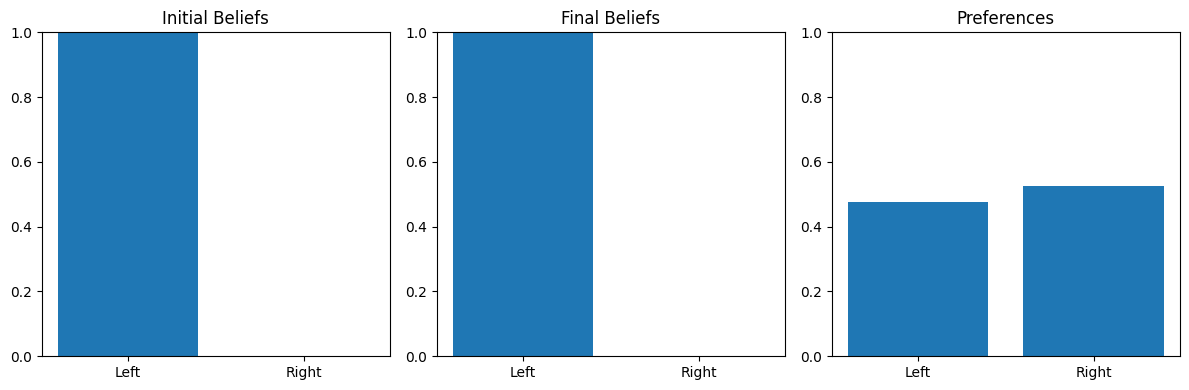

<module 'matplotlib.pyplot' from '/Users/Lancelotdacosta/Desktop/code-projects/pymdp/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [14]:
batch_idx = 0
print_rollout(info, batch_idx=batch_idx)
plot_beliefs(info, agent, batch_idx=batch_idx)